In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


In [2]:
def load_data(path_to_directory):
    train_data = np.array(pd.read_csv(path_to_directory+'/train.csv'))
    train_labels = np.array(pd.read_csv(path_to_directory+'/label_train.csv')).flatten()
    val_data = np.array(pd.read_csv(path_to_directory+'/validate.csv'))
    val_labels = np.array(pd.read_csv(path_to_directory+'/Label_validate.csv')).flatten()
    return train_data, train_labels, val_data, val_labels

In [3]:
train_data, train_labels, val_data, val_labels = load_data('.')

In [4]:
print('size of train_data', train_data.shape)
print('size of train_labels', train_labels.shape)
print('size of val_data', val_data.shape)
print('size of val_labels', val_labels.shape)

size of train_data (2599, 1433)
size of train_labels (2599,)
size of val_data (107, 1433)
size of val_labels (107,)


In [5]:
def create_initial_population(population_size = 100, num_features=train_data.shape[1]):
    population = random.randint(0, 2, (population_size, num_features))
    return population

In [6]:
initial_population = create_initial_population(population_size = 500, num_features = train_data.shape[1])
initial_population

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 1, 1]])

In [6]:
def fitness_function(X, current_data, current_labels, val_data, val_labels):
    predicted_labels = []
    for i in range(val_data.shape[0]):
        q = val_data[i]
        current_labels = []
        index = 0
        score = 0.0
        for xi in X:
            dot_prod = np.dot(xi, q)
            mag_xi = np.linalg.norm(xi)
            mag_q = np.linalg.norm(q)
            cosine_score = dot_prod/(mag_xi * mag_q)
            current_labels.append(cosine_score)
        predicted_labels.append(np.argmax(current_labels))
    accuracy = np.mean(predicted_labels == val_labels)
    return accuracy

In [7]:
def select_solutions(population, fitness_scores, selection_percentage):
    selected_indices = np.random.choice(len(population), size=int(len(population) * selection_percentage), 
                                        replace=False, p=fitness_scores / np.sum(fitness_scores))
    return selected_indices

In [8]:
def evaluate_fitness(X, population, train_data, train_labels, val_data, val_labels):
    accuracies = []
    for chromosome in population:
        selected_indices = np.where(chromosome == 1)[0]
        current_accuracy = fitness_function(X[:, selected_indices], train_data[:, selected_indices], train_labels, val_data[:, selected_indices], val_labels)
        accuracies.append(current_accuracy)
    accuracies = np.array(accuracies)
    return accuracies

In [9]:
def crossover_parents(parents):
    combined_offspring = []
    for i in range(0, len(parents), 2):
        if i+1 < len(parents):
            first_parent, second_parent = parents[i], parents[i+1]
            crossover_position = np.random.randint(len(first_parent))
            offspring1 = np.concatenate((first_parent[:crossover_position], second_parent[crossover_position:]))
            offspring2 = np.concatenate((second_parent[:crossover_position], first_parent[crossover_position:]))
            combined_offspring.extend([offspring1, offspring2])
        else:
            combined_offspring.extend([parents[i]])
    return np.array(combined_offspring)

In [10]:
def mutation(offspring_population, mutation_rate):
    mutated_offspring_population = offspring_population.copy()
    for chromosome in mutated_offspring_population:
        num_bits_to_flip = int(mutation_rate * len(chromosome))
        flip_indices = np.random.choice(len(chromosome), size=num_bits_to_flip, replace=False)
        for index in flip_indices:
            chromosome[index] = 1 - chromosome[index]
    return mutated_offspring_population

In [11]:
def plot_fitness_score_evolution(data):
    x  = np.arange(0, len(data), 1)
    y = data
    plt.plot(x, y)
    plt.title('Fitness score vs generation')
    plt.show()

In [12]:
def genetic_algorithm(population_size=200, num_generations=50, selection_percentage=0.3, mutation_rate=0.1):
    train_data, train_labels, val_data, val_labels = load_data('.')
    X = []
    for label in range(0, 7):
        label_data = train_data[train_labels == label]
        average = np.mean(label_data, axis = 0)
        X.append(average)
    X = np.array(X)

    best_fitness_score_evolution = []
    population = create_initial_population(population_size = population_size, num_features = train_data.shape[1])
    for generation in range(num_generations):
        
        print(f'Evaluating the {generation}th generation')
        fitness_scores = evaluate_fitness(X, population, train_data, train_labels, val_data, val_labels)
        sorted_indices = np.argsort(fitness_scores)[::-1]
        sorted_population = population[sorted_indices]
        sorted_fitness_scores = fitness_scores[sorted_indices]
        
        selected_indices = select_solutions(sorted_population, sorted_fitness_scores, selection_percentage)
        
        offsprings = crossover_parents(population[selected_indices])
        mutated_offsprings = mutation(offsprings, mutation_rate=0.1)

        new_population = population.copy()
        new_population[:len(selected_indices), :] = mutated_offsprings
        new_population[len(selected_indices):, :] = sorted_population[:len(sorted_population)-len(selected_indices), :]

        best_solution_index = np.argmax(fitness_scores)
        best_solution = population[best_solution_index]
        best_fitness_score_evolution.append(fitness_scores[best_solution_index])
        print(f'Best Fitness score :{max(fitness_scores)} obtained at population: {best_solution_index}')
        population = new_population
        print('-------------------------------------------------------------------')
    plot_fitness_score_evolution(best_fitness_score_evolution)
    best_solution_index = np.argmax(fitness_scores)
    best_solution = population[best_solution_index]
    return best_solution, fitness_scores[best_solution_index]

Evaluating the 0th generation
Best Fitness score :0.5981308411214953 obtained at population: 2
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.5981308411214953 obtained at population: 5
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6074766355140186 obtained at population: 1
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6074766355140186 obtained at population: 5
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6074766355140186 obtained at population: 5
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6074766355140186 obtained at population: 5
-------------------------------------------------------------------
Evaluating the 6th gen

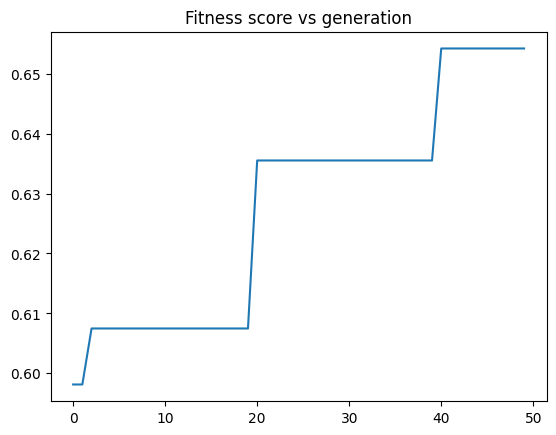

(array([0, 0, 1, ..., 1, 0, 1]), 0.6542056074766355)

In [85]:
genetic_algorithm(50, 50, 0.1, 0.1)

Evaluating the 0th generation
Best Fitness score :0.6074766355140186 obtained at population: 32
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.616822429906542 obtained at population: 4
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.616822429906542 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.616822429906542 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.616822429906542 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.616822429906542 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 6th gen

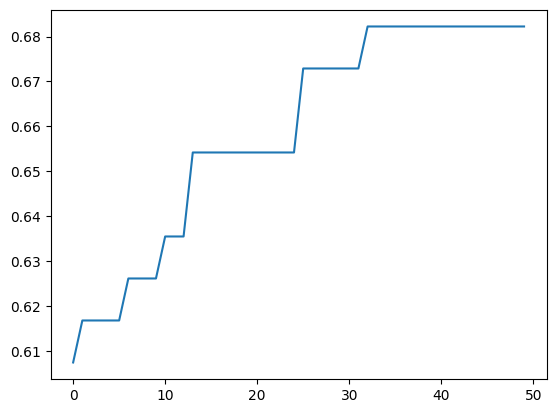

(array([1, 1, 1, ..., 1, 0, 0]), 0.6822429906542056)

In [70]:
genetic_algorithm(100, 50, 0.3, 0.2)

Evaluating the 0th generation
Best Fitness score :0.6074766355140186 obtained at population: 77
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6074766355140186 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6074766355140186 obtained at population: 20
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6074766355140186 obtained at population: 16
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6074766355140186 obtained at population: 28
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.616822429906542 obtained at population: 5
-------------------------------------------------------------------
Evaluating the 6th

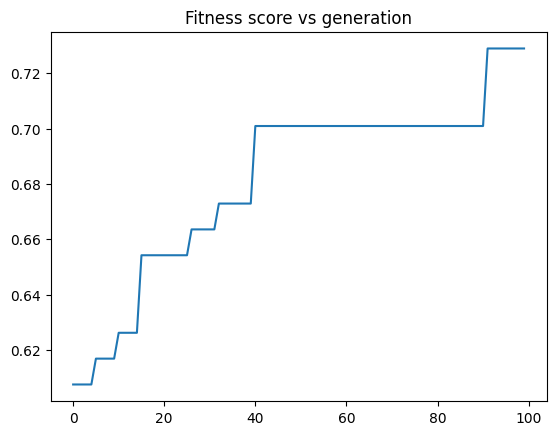

(array([1, 1, 1, ..., 1, 1, 1]), 0.7289719626168224)

In [72]:
genetic_algorithm(100, 100, 0.3, 0.2)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6355140186915887 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 53
-------------------------------------------------------------------
Evaluating the 6

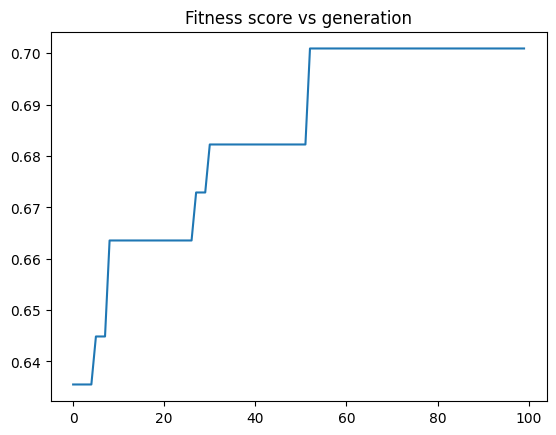

(array([1, 1, 0, ..., 0, 0, 1]), 0.7009345794392523)

In [73]:
genetic_algorithm(200, 100, 0.3, 0.2)

Evaluating the 0th generation
Best Fitness score :0.616822429906542 obtained at population: 49
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.616822429906542 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.616822429906542 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.616822429906542 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.616822429906542 obtained at population: 7
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.616822429906542 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 6th gene

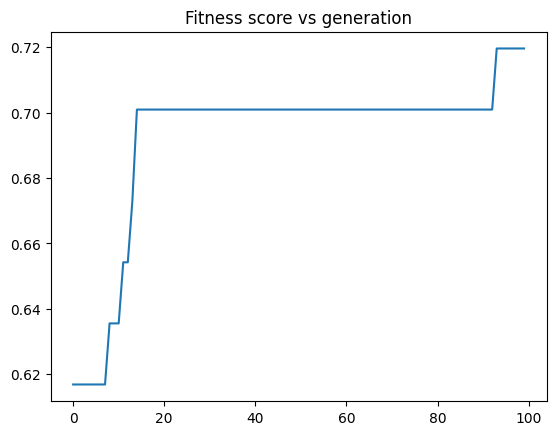

(array([0, 0, 0, ..., 1, 1, 0]), 0.719626168224299)

In [74]:
genetic_algorithm(200, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6261682242990654 obtained at population: 72
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6261682242990654 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 71
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 35
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 6

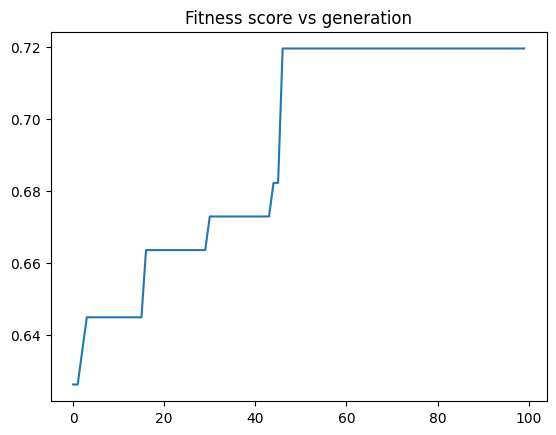

(array([1, 1, 0, ..., 1, 1, 1]), 0.719626168224299)

In [76]:
genetic_algorithm(300, 100, 0.3, 0.2)

Evaluating the 0th generation
Best Fitness score :0.616822429906542 obtained at population: 293
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.616822429906542 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.616822429906542 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6261682242990654 obtained at population: 11
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6355140186915887 obtained at population: 32
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 51
-------------------------------------------------------------------
Evaluating the 6th

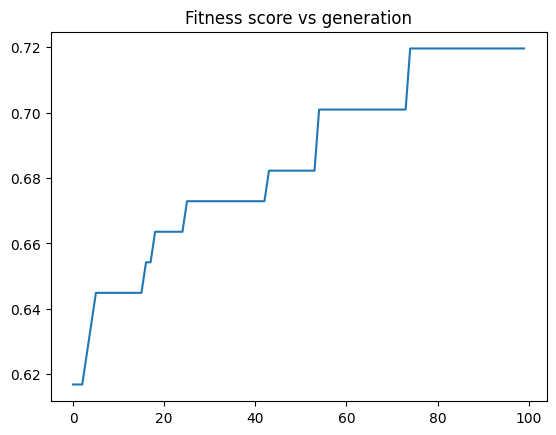

(array([0, 0, 0, ..., 0, 0, 0]), 0.719626168224299)

In [75]:
genetic_algorithm(300, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6074766355140186 obtained at population: 66
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6074766355140186 obtained at population: 17
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6074766355140186 obtained at population: 50
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6074766355140186 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.616822429906542 obtained at population: 11
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6355140186915887 obtained at population: 5
-------------------------------------------------------------------
Evaluating the 6th

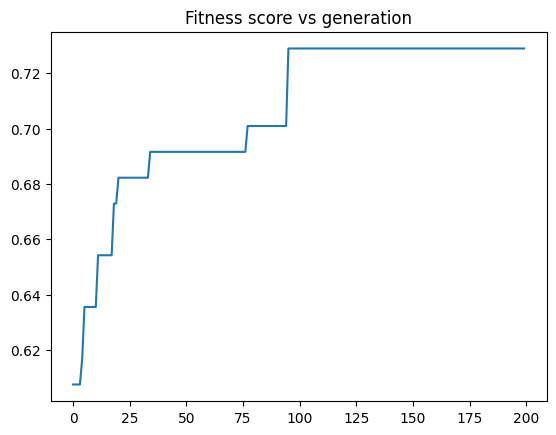

(array([0, 0, 0, ..., 1, 1, 1]), 0.7289719626168224)

In [23]:
genetic_algorithm(300, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6542056074766355 obtained at population: 194
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6542056074766355 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6542056074766355 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6542056074766355 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6542056074766355 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6542056074766355 obtained at population: 120
-------------------------------------------------------------------
Evaluating

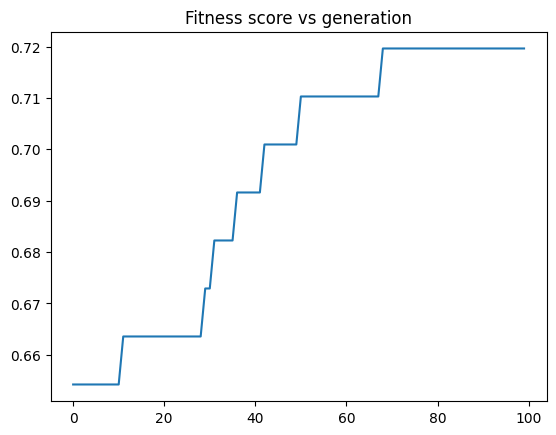

(array([1, 0, 1, ..., 1, 1, 1]), 0.719626168224299)

In [78]:
genetic_algorithm(400, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6261682242990654 obtained at population: 105
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6261682242990654 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6261682242990654 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 72
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6355140186915887 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6355140186915887 obtained at population: 120
-------------------------------------------------------------------
Evaluating 

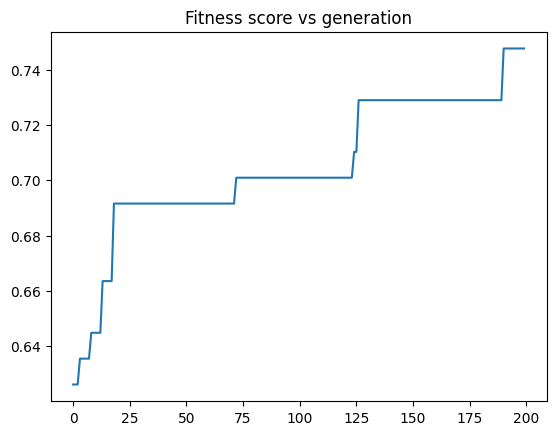

(array([1, 0, 1, ..., 1, 0, 1]), 0.7476635514018691)

In [24]:
genetic_algorithm(400, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 343
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 150
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 74
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 150
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6635514018691588 obtained at population: 74
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6635514018691588 obtained at population: 150
-------------------------------------------------------------------
Evaluating t

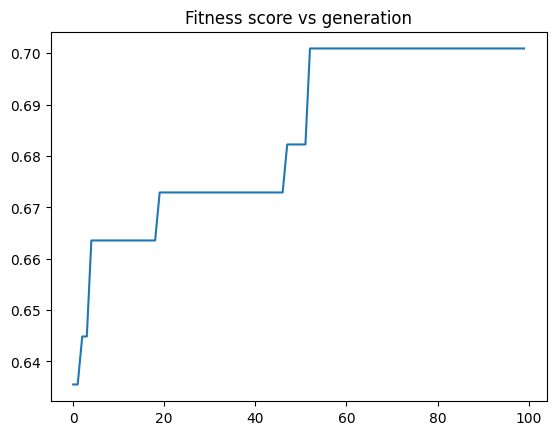

(array([1, 0, 0, ..., 1, 0, 0]), 0.7009345794392523)

In [79]:
genetic_algorithm(500, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6261682242990654 obtained at population: 125
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6261682242990654 obtained at population: 180
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6261682242990654 obtained at population: 180
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6261682242990654 obtained at population: 57
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6542056074766355 obtained at population: 86
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6542056074766355 obtained at population: 180
-------------------------------------------------------------------
Evaluating t

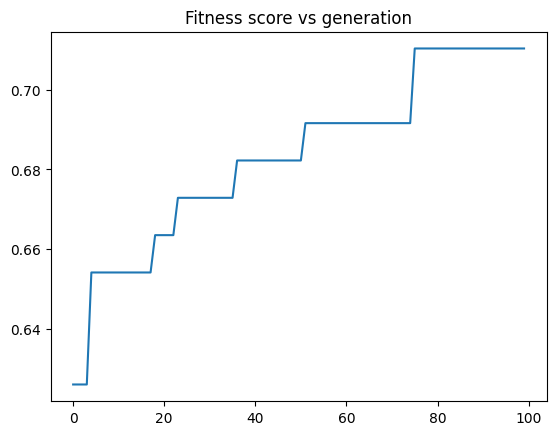

(array([1, 0, 1, ..., 1, 1, 1]), 0.7102803738317757)

In [25]:
genetic_algorithm(600, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.5887850467289719 obtained at population: 44
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.5887850467289719 obtained at population: 4
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.5887850467289719 obtained at population: 15
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6074766355140186 obtained at population: 2
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6074766355140186 obtained at population: 15
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6074766355140186 obtained at population: 15
-------------------------------------------------------------------
Evaluating the 6th

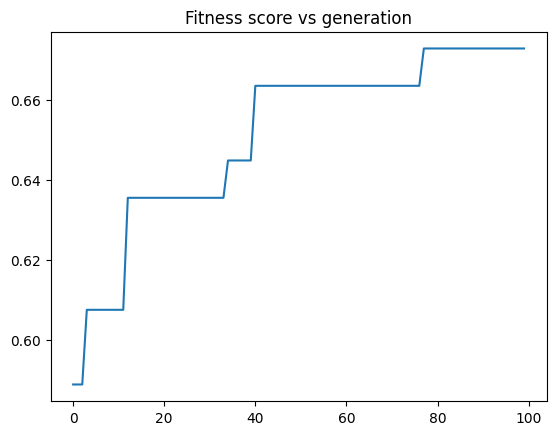

(array([1, 0, 0, ..., 1, 0, 1]), 0.6728971962616822)

In [82]:
genetic_algorithm(50, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6448598130841121 obtained at population: 45
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 180
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 180
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 180
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 180
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 180
-------------------------------------------------------------------
Evaluating 

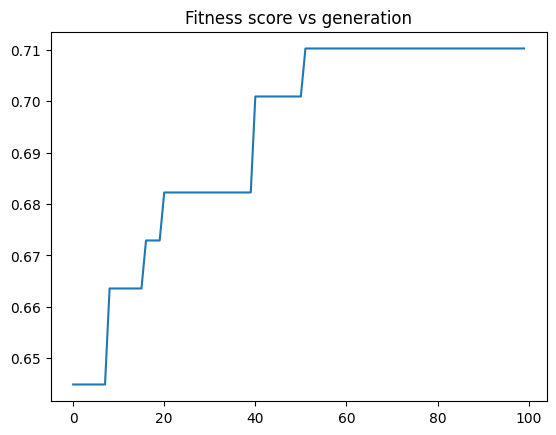

(array([1, 1, 0, ..., 1, 1, 0]), 0.7102803738317757)

In [83]:
genetic_algorithm(600, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6261682242990654 obtained at population: 49
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6261682242990654 obtained at population: 210
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6261682242990654 obtained at population: 49
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6261682242990654 obtained at population: 210
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6261682242990654 obtained at population: 117
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6542056074766355 obtained at population: 72
-------------------------------------------------------------------
Evaluating th

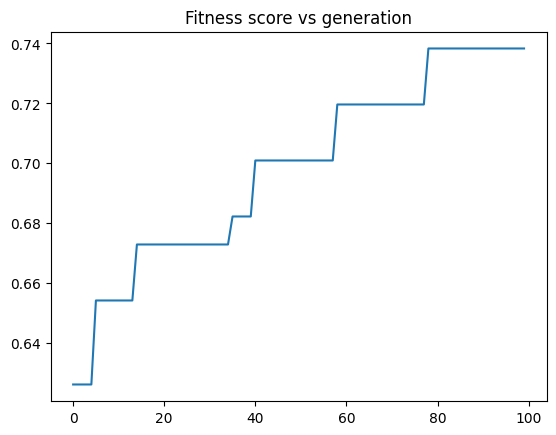

(array([0, 0, 1, ..., 1, 0, 1]), 0.7383177570093458)

In [97]:
genetic_algorithm(700, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 127
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 240
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 240
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 240
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 109
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 240
-------------------------------------------------------------------
Evaluating

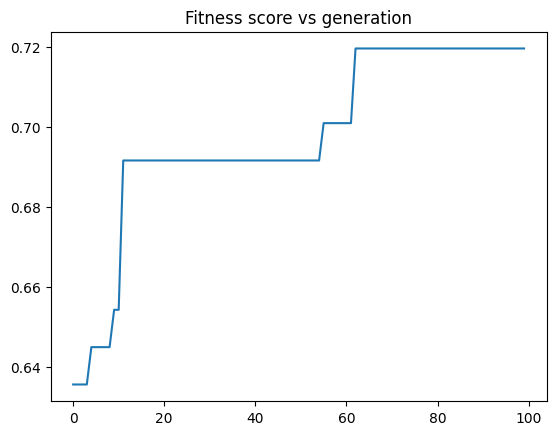

(array([0, 1, 0, ..., 0, 1, 1]), 0.719626168224299)

In [98]:
genetic_algorithm(800, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 65
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 270
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 270
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 270
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6355140186915887 obtained at population: 188
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 136
-------------------------------------------------------------------
Evaluating 

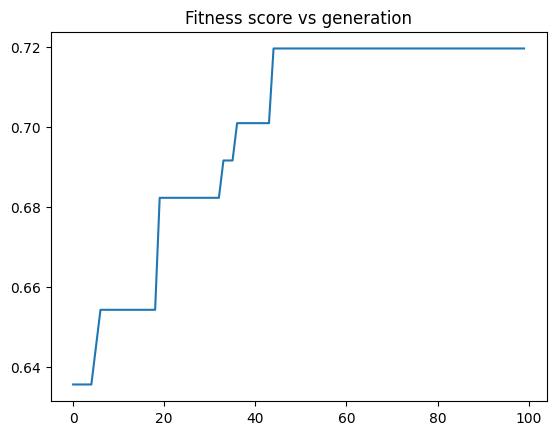

(array([1, 0, 1, ..., 1, 0, 1]), 0.719626168224299)

In [99]:
genetic_algorithm(900, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6448598130841121 obtained at population: 935
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 300
-------------------------------------------------------------------
Evaluating

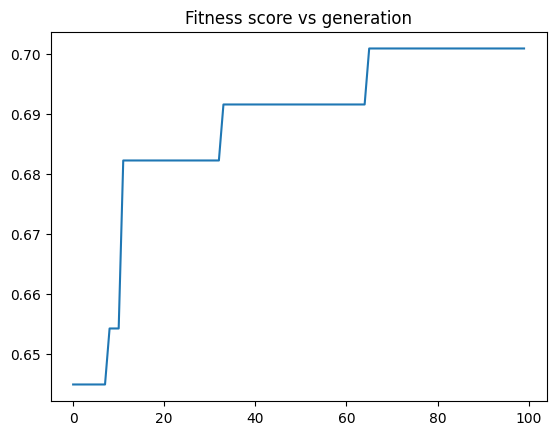

(array([1, 1, 1, ..., 0, 0, 1]), 0.7009345794392523)

In [100]:
genetic_algorithm(1000, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 47
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 330
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 298
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 330
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6355140186915887 obtained at population: 154
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 180
-------------------------------------------------------------------
Evaluating 

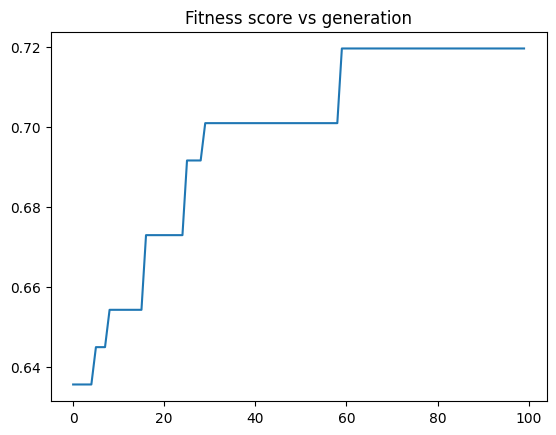

(array([1, 1, 1, ..., 1, 0, 1]), 0.719626168224299)

In [102]:
genetic_algorithm(1100, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6448598130841121 obtained at population: 447
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 360
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 360
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 360
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 360
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6635514018691588 obtained at population: 173
-------------------------------------------------------------------
Evaluating

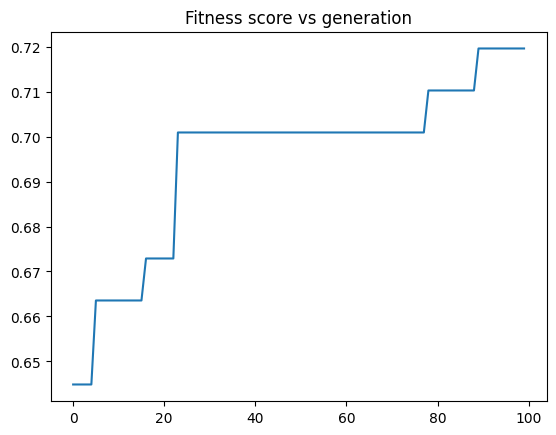

(array([1, 1, 1, ..., 0, 1, 1]), 0.719626168224299)

In [104]:
genetic_algorithm(1200, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 932
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 390
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 390
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 243
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 390
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 390
-------------------------------------------------------------------
Evaluating

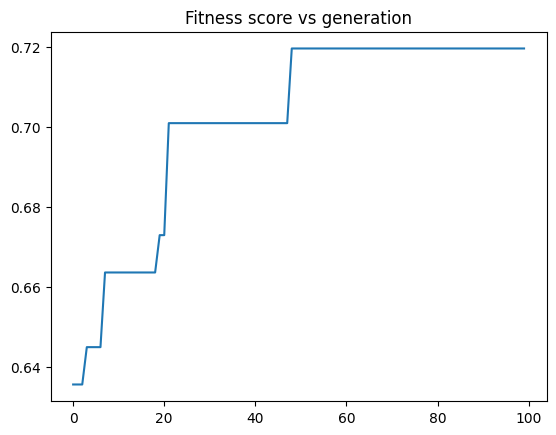

(array([1, 0, 1, ..., 0, 1, 1]), 0.719626168224299)

In [105]:
genetic_algorithm(1300, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6261682242990654 obtained at population: 493
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6261682242990654 obtained at population: 420
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6261682242990654 obtained at population: 61
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6261682242990654 obtained at population: 273
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6261682242990654 obtained at population: 420
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6261682242990654 obtained at population: 170
-------------------------------------------------------------------
Evaluating 

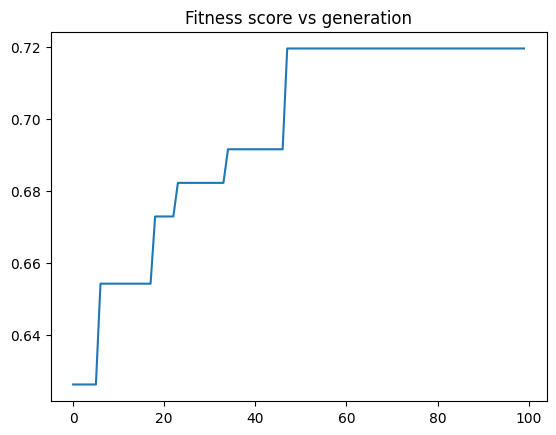

(array([1, 0, 1, ..., 1, 1, 0]), 0.719626168224299)

In [106]:
genetic_algorithm(1400, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 217
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 113
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 450
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 307
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 450
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 450
-------------------------------------------------------------------
Evaluating

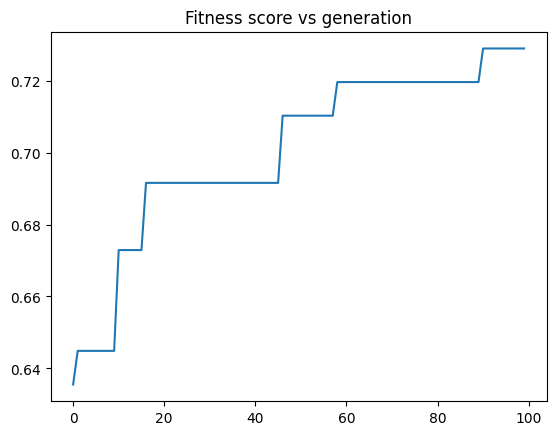

(array([0, 0, 1, ..., 0, 0, 0]), 0.7289719626168224)

In [107]:
genetic_algorithm(1500, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 1580
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 366
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 480
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 480
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 83
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6728971962616822 obtained at population: 288
-------------------------------------------------------------------
Evaluating

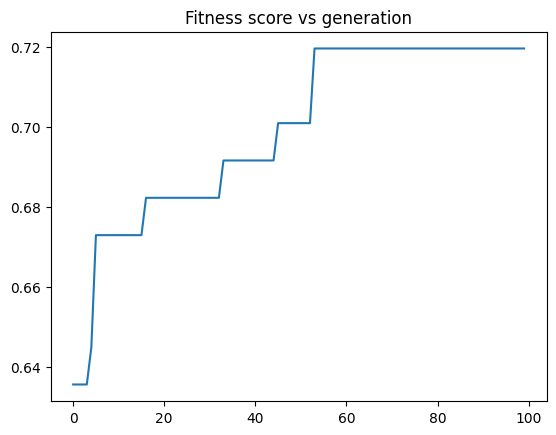

(array([1, 0, 1, ..., 0, 0, 1]), 0.719626168224299)

In [108]:
genetic_algorithm(1600, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6542056074766355 obtained at population: 1445
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6542056074766355 obtained at population: 510
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6542056074766355 obtained at population: 296
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6542056074766355 obtained at population: 88
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6542056074766355 obtained at population: 510
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6542056074766355 obtained at population: 510
-------------------------------------------------------------------
Evaluating

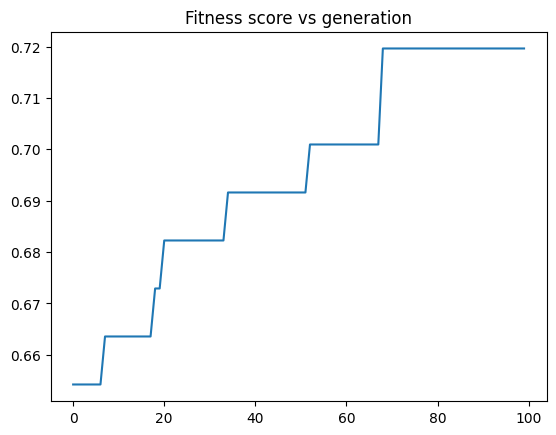

(array([0, 1, 1, ..., 0, 0, 1]), 0.719626168224299)

In [109]:
genetic_algorithm(1700, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 1623
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 540
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 540
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 0
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 540
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6542056074766355 obtained at population: 7
-------------------------------------------------------------------
Evaluating th

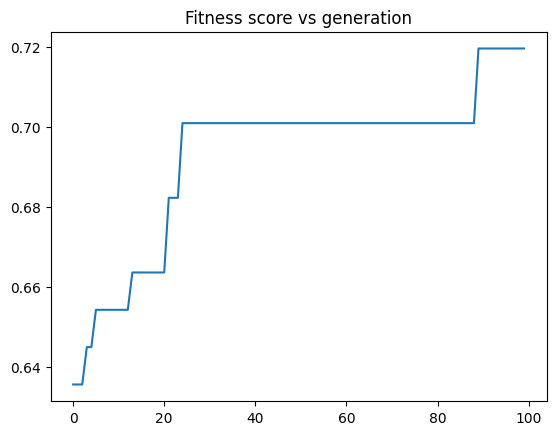

(array([1, 0, 0, ..., 1, 0, 0]), 0.719626168224299)

In [110]:
genetic_algorithm(1800, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 1646
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6542056074766355 obtained at population: 101
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6542056074766355 obtained at population: 570
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6542056074766355 obtained at population: 570
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6635514018691588 obtained at population: 540
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6635514018691588 obtained at population: 570
-------------------------------------------------------------------
Evaluatin

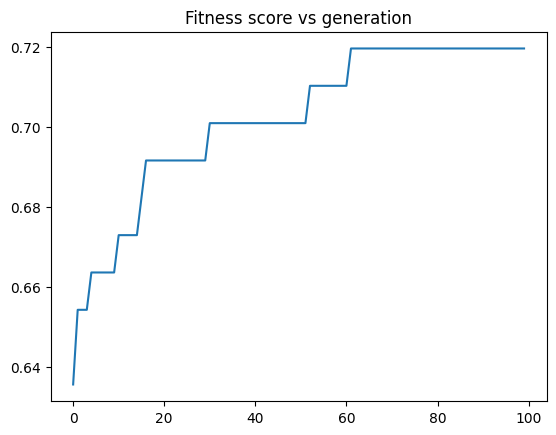

(array([0, 1, 1, ..., 0, 0, 0]), 0.719626168224299)

In [111]:
genetic_algorithm(1900, 100, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.5887850467289719 obtained at population: 29
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.5887850467289719 obtained at population: 20
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.5887850467289719 obtained at population: 11
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.5887850467289719 obtained at population: 20
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.5887850467289719 obtained at population: 20
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6261682242990654 obtained at population: 1
-------------------------------------------------------------------
Evaluating the 6t

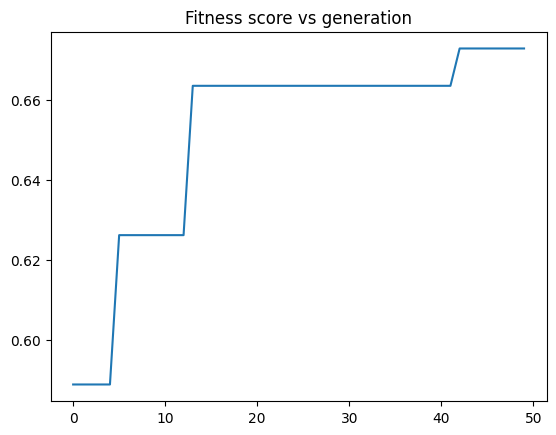

(array([1, 1, 0, ..., 1, 0, 0]), 0.6728971962616822)

In [88]:
genetic_algorithm(100, 50, 0.2, 0.1)

Evaluating the 0th generation
Best Fitness score :0.6261682242990654 obtained at population: 74
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6261682242990654 obtained at population: 20
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6261682242990654 obtained at population: 20
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6261682242990654 obtained at population: 15
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6261682242990654 obtained at population: 20
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6261682242990654 obtained at population: 20
-------------------------------------------------------------------
Evaluating the 6

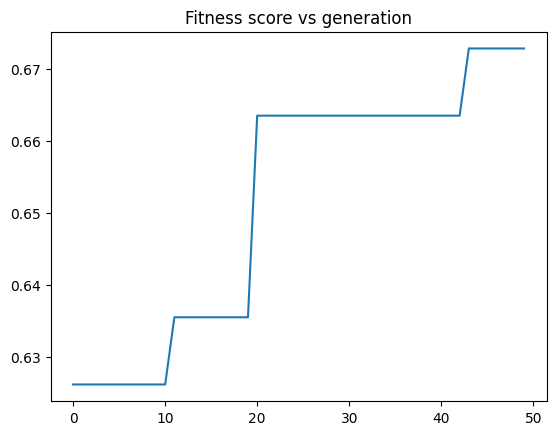

(array([0, 0, 0, ..., 0, 0, 1]), 0.6728971962616822)

In [89]:
genetic_algorithm(100, 50, 0.2, 0.2)

Evaluating the 0th generation
Best Fitness score :0.5887850467289719 obtained at population: 27
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.5887850467289719 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.5981308411214953 obtained at population: 15
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.5981308411214953 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.5981308411214953 obtained at population: 17
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6074766355140186 obtained at population: 8
-------------------------------------------------------------------
Evaluating the 6t

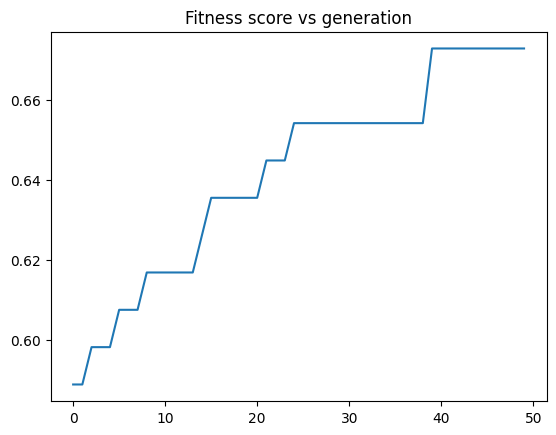

(array([0, 1, 0, ..., 0, 0, 1]), 0.6728971962616822)

In [90]:
genetic_algorithm(100, 50, 0.3, 0.2)

Evaluating the 0th generation
Best Fitness score :0.616822429906542 obtained at population: 80
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.616822429906542 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.616822429906542 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.616822429906542 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.616822429906542 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.616822429906542 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 6th gen

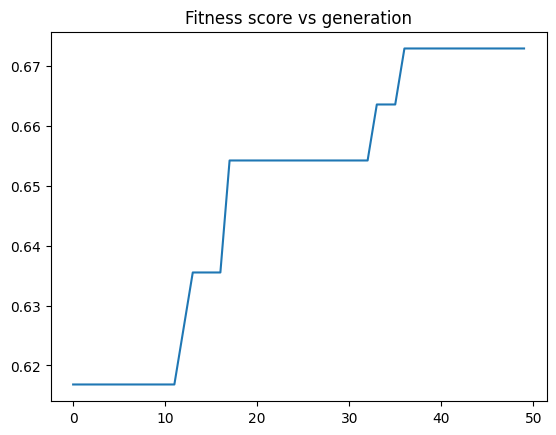

(array([1, 1, 1, ..., 0, 0, 1]), 0.6728971962616822)

In [91]:
genetic_algorithm(100, 50, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.616822429906542 obtained at population: 41
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.616822429906542 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.616822429906542 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.616822429906542 obtained at population: 18
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.616822429906542 obtained at population: 1
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.616822429906542 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 6th gene

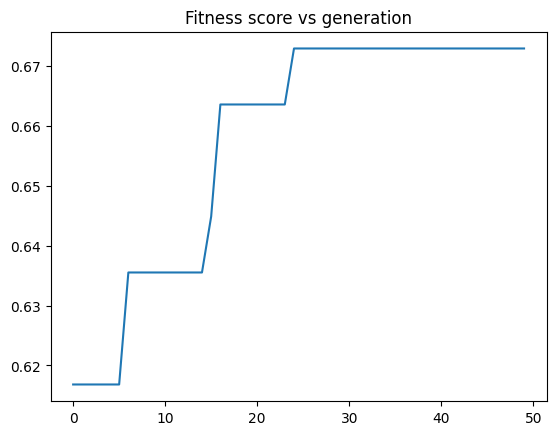

(array([0, 1, 0, ..., 0, 1, 1]), 0.6728971962616822)

In [92]:
genetic_algorithm(100, 50, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.5981308411214953 obtained at population: 1
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.616822429906542 obtained at population: 1
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.616822429906542 obtained at population: 40
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.616822429906542 obtained at population: 40
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6635514018691588 obtained at population: 37
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6635514018691588 obtained at population: 40
-------------------------------------------------------------------
Evaluating the 6th ge

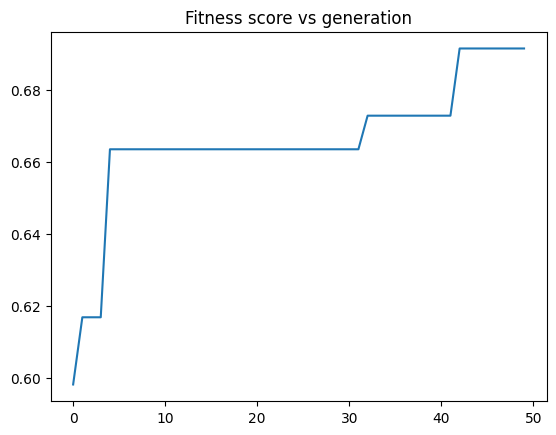

(array([0, 0, 0, ..., 1, 1, 1]), 0.6915887850467289)

In [93]:
genetic_algorithm(100, 50, 0.4, 0.3)

Evaluating the 0th generation
Best Fitness score :0.616822429906542 obtained at population: 91
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.616822429906542 obtained at population: 40
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.616822429906542 obtained at population: 40
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.616822429906542 obtained at population: 40
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.616822429906542 obtained at population: 40
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.616822429906542 obtained at population: 40
-------------------------------------------------------------------
Evaluating the 6th gen

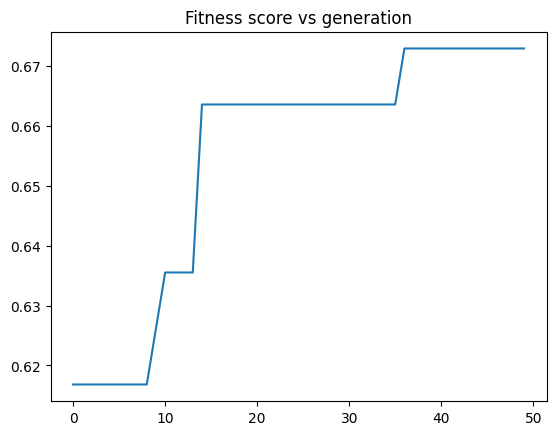

(array([1, 0, 0, ..., 0, 0, 0]), 0.6728971962616822)

In [94]:
genetic_algorithm(100, 50, 0.4, 0.4)

Evaluating the 0th generation
Best Fitness score :0.616822429906542 obtained at population: 8
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.616822429906542 obtained at population: 50
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6261682242990654 obtained at population: 44
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6261682242990654 obtained at population: 50
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6355140186915887 obtained at population: 35
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6355140186915887 obtained at population: 50
-------------------------------------------------------------------
Evaluating the 6th 

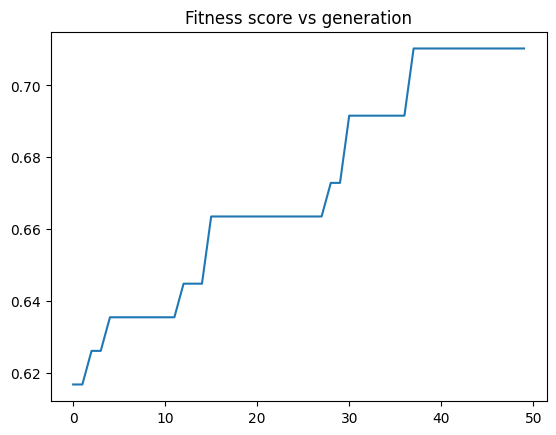

(array([1, 0, 0, ..., 0, 0, 1]), 0.7102803738317757)

In [95]:
genetic_algorithm(100, 50, 0.5, 0.4)

Evaluating the 0th generation
Best Fitness score :0.616822429906542 obtained at population: 4
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.616822429906542 obtained at population: 50
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 42
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 50
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6355140186915887 obtained at population: 50
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6355140186915887 obtained at population: 43
-------------------------------------------------------------------
Evaluating the 6th 

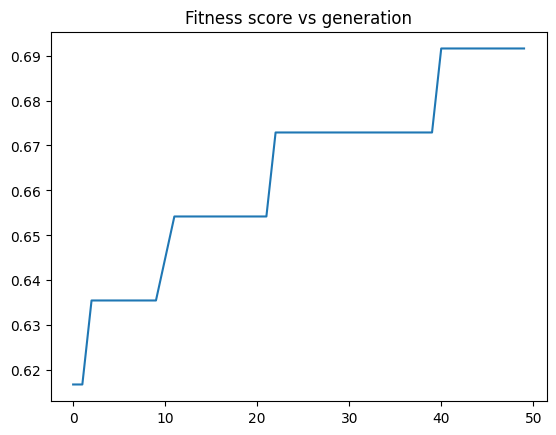

(array([0, 1, 0, ..., 1, 1, 1]), 0.6915887850467289)

In [96]:
genetic_algorithm(100, 50, 0.5, 0.5)

Evaluating the 0th generation
Best Fitness score :0.5700934579439252 obtained at population: 4
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.5700934579439252 obtained at population: 2
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.5700934579439252 obtained at population: 3
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.5700934579439252 obtained at population: 3
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.5700934579439252 obtained at population: 3
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6074766355140186 obtained at population: 1
-------------------------------------------------------------------
Evaluating the 6th gen

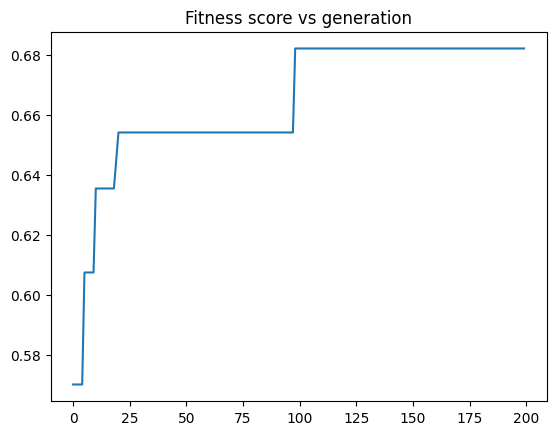

(array([0, 1, 1, ..., 0, 1, 1]), 0.6822429906542056)

In [49]:
genetic_algorithm(10, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.5700934579439252 obtained at population: 6
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.5700934579439252 obtained at population: 6
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.5794392523364486 obtained at population: 4
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.5794392523364486 obtained at population: 1
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.5794392523364486 obtained at population: 6
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.5794392523364486 obtained at population: 6
-------------------------------------------------------------------
Evaluating the 6th gen

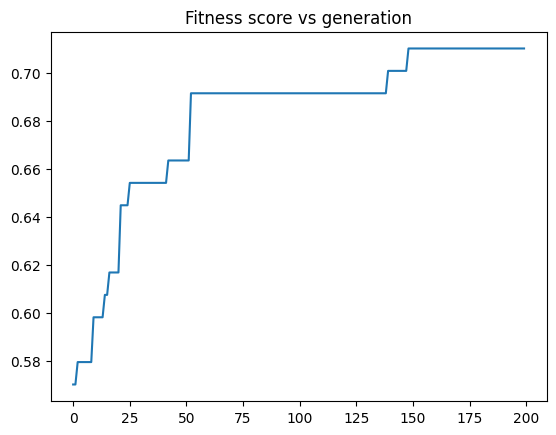

(array([0, 1, 1, ..., 0, 0, 1]), 0.7102803738317757)

In [46]:
genetic_algorithm(20, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.5887850467289719 obtained at population: 0
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.5981308411214953 obtained at population: 0
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.5981308411214953 obtained at population: 9
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6261682242990654 obtained at population: 1
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6261682242990654 obtained at population: 9
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6261682242990654 obtained at population: 9
-------------------------------------------------------------------
Evaluating the 6th gen

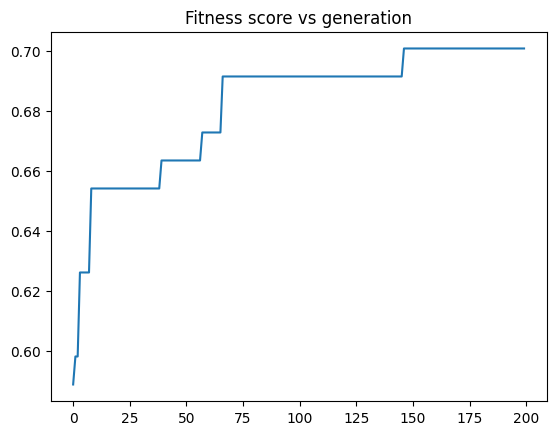

(array([1, 1, 0, ..., 0, 0, 0]), 0.7009345794392523)

In [47]:
genetic_algorithm(30, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.5981308411214953 obtained at population: 16
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6074766355140186 obtained at population: 10
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6074766355140186 obtained at population: 9
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6074766355140186 obtained at population: 12
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6074766355140186 obtained at population: 12
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6074766355140186 obtained at population: 12
-------------------------------------------------------------------
Evaluating the 6t

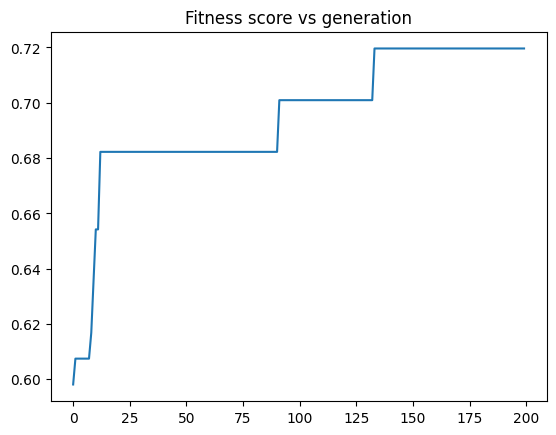

(array([1, 0, 1, ..., 0, 0, 0]), 0.719626168224299)

In [48]:
genetic_algorithm(40, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6542056074766355 obtained at population: 1
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6542056074766355 obtained at population: 15
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6542056074766355 obtained at population: 15
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6542056074766355 obtained at population: 15
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6542056074766355 obtained at population: 15
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6542056074766355 obtained at population: 15
-------------------------------------------------------------------
Evaluating the 6t

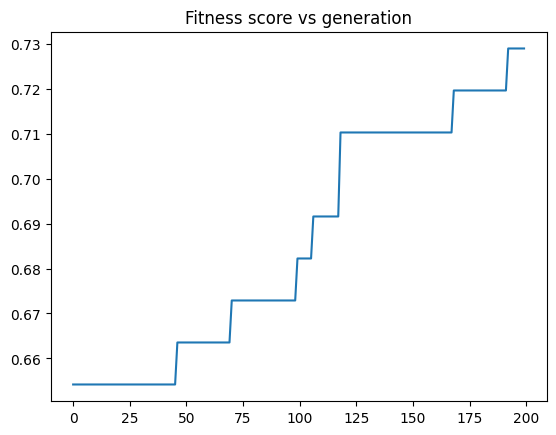

(array([0, 1, 0, ..., 0, 1, 0]), 0.7289719626168224)

In [45]:
genetic_algorithm(50, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6542056074766355 obtained at population: 704
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6542056074766355 obtained at population: 450
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6542056074766355 obtained at population: 450
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6542056074766355 obtained at population: 450
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6542056074766355 obtained at population: 450
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6542056074766355 obtained at population: 450
-------------------------------------------------------------------
Evaluating

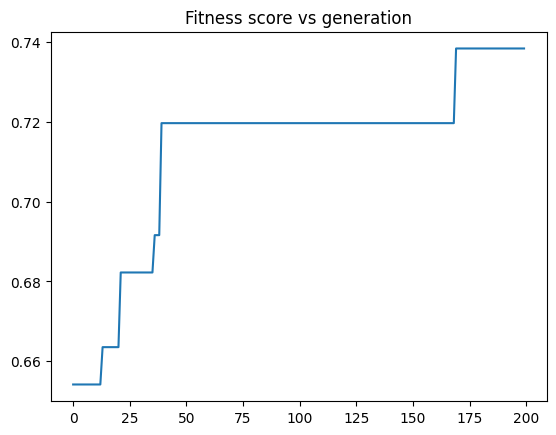

(array([0, 0, 0, ..., 0, 0, 1]), 0.7383177570093458)

In [112]:
genetic_algorithm(1500, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 954
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 420
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 420
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6635514018691588 obtained at population: 365
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6635514018691588 obtained at population: 420
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6635514018691588 obtained at population: 420
-------------------------------------------------------------------
Evaluating

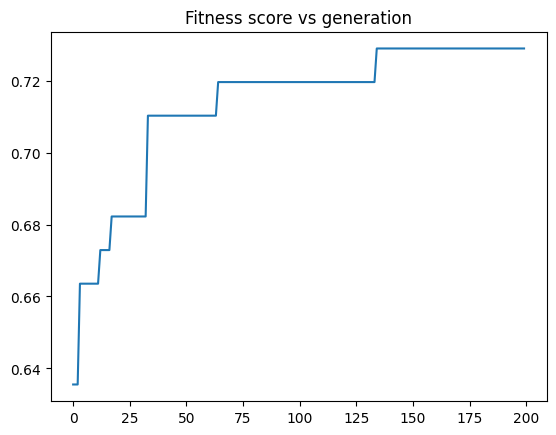

(array([0, 1, 0, ..., 0, 1, 0]), 0.7289719626168224)

In [113]:
genetic_algorithm(1400, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6448598130841121 obtained at population: 235
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 390
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 390
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 390
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 266
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 202
-------------------------------------------------------------------
Evaluating

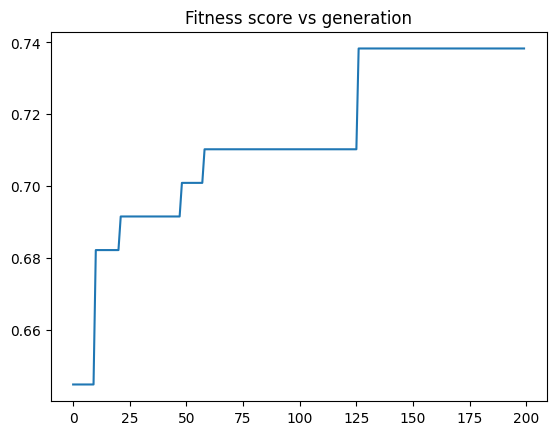

(array([0, 0, 1, ..., 1, 1, 0]), 0.7383177570093458)

In [114]:
genetic_algorithm(1300, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6728971962616822 obtained at population: 281
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6728971962616822 obtained at population: 360
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6728971962616822 obtained at population: 360
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6728971962616822 obtained at population: 360
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6728971962616822 obtained at population: 360
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6728971962616822 obtained at population: 360
-------------------------------------------------------------------
Evaluating

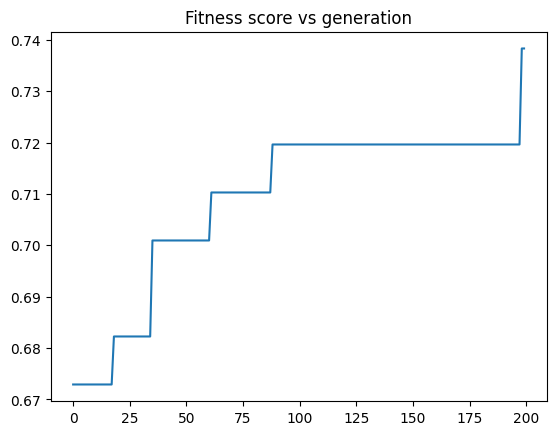

(array([0, 0, 1, ..., 1, 1, 0]), 0.7383177570093458)

In [115]:
genetic_algorithm(1200, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6261682242990654 obtained at population: 767
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6261682242990654 obtained at population: 330
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 11
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 92
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 330
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 5
-------------------------------------------------------------------
Evaluating the

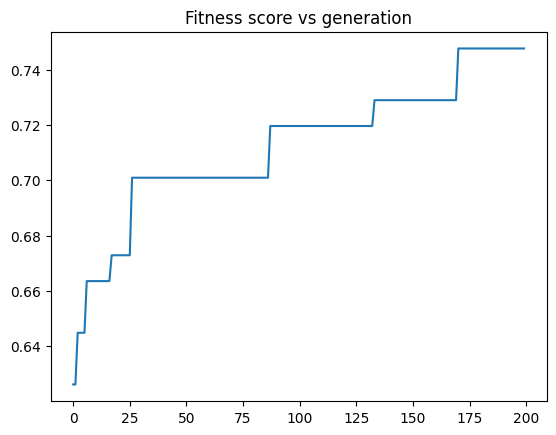

(array([1, 0, 0, ..., 0, 0, 0]), 0.7476635514018691)

In [116]:
genetic_algorithm(1100, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 734
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6355140186915887 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6355140186915887 obtained at population: 113
-------------------------------------------------------------------
Evaluating

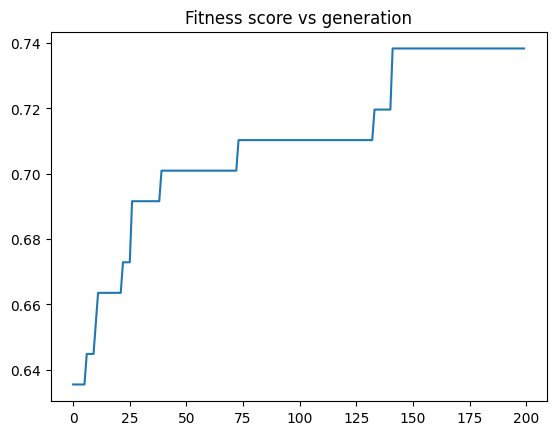

(array([0, 1, 0, ..., 1, 0, 0]), 0.7383177570093458)

In [117]:
genetic_algorithm(1000, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6448598130841121 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 270
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 270
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 270
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 270
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 270
-------------------------------------------------------------------
Evaluating 

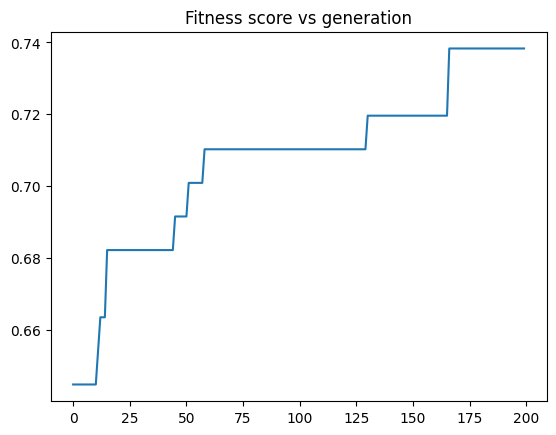

(array([0, 1, 1, ..., 0, 0, 1]), 0.7383177570093458)

In [118]:
genetic_algorithm(900, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6448598130841121 obtained at population: 1225
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 480
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 286
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 480
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 480
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6542056074766355 obtained at population: 320
-------------------------------------------------------------------
Evaluatin

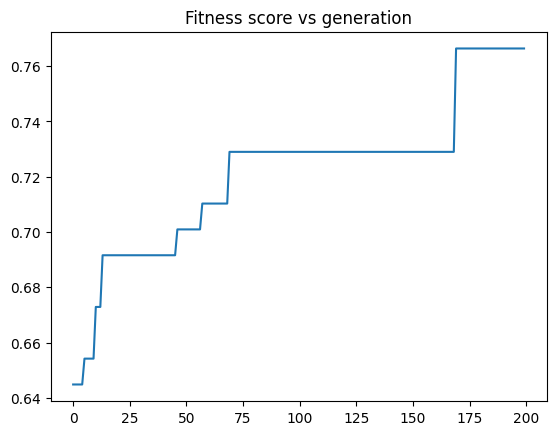

(array([0, 0, 0, ..., 1, 0, 0]), 0.7663551401869159)

In [119]:
genetic_algorithm(1600, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6448598130841121 obtained at population: 718
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 300
-------------------------------------------------------------------
Evaluating

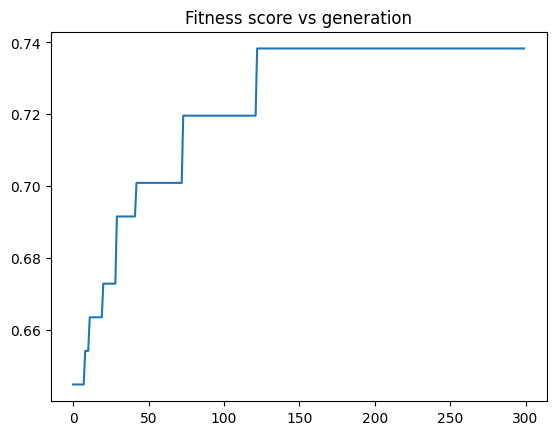

(array([1, 0, 1, ..., 1, 0, 1]), 0.7383177570093458)

In [14]:
genetic_algorithm(1000, 300, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6448598130841121 obtained at population: 369
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 330
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 330
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 330
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 330
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 330
-------------------------------------------------------------------
Evaluating

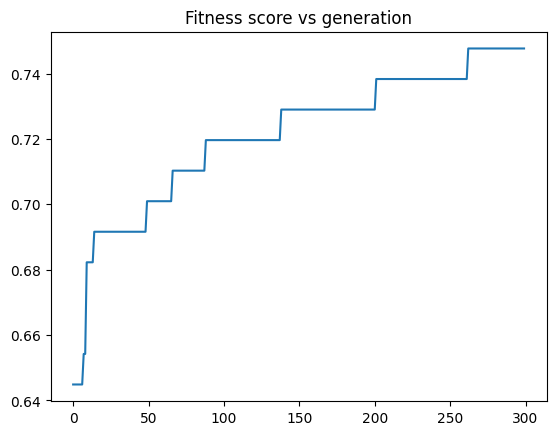

(array([1, 1, 1, ..., 0, 1, 0]), 0.7476635514018691)

In [15]:
genetic_algorithm(1100, 300, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6448598130841121 obtained at population: 499
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 360
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6542056074766355 obtained at population: 52
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6542056074766355 obtained at population: 360
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6542056074766355 obtained at population: 39
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6542056074766355 obtained at population: 190
-------------------------------------------------------------------
Evaluating t

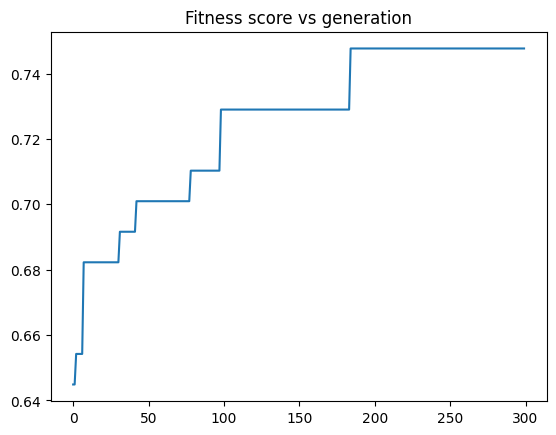

(array([1, 0, 1, ..., 0, 0, 1]), 0.7476635514018691)

In [16]:
genetic_algorithm(1200, 300, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6728971962616822 obtained at population: 1045
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6728971962616822 obtained at population: 390
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6728971962616822 obtained at population: 390
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6915887850467289 obtained at population: 145
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6915887850467289 obtained at population: 390
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6915887850467289 obtained at population: 390
-------------------------------------------------------------------
Evaluatin

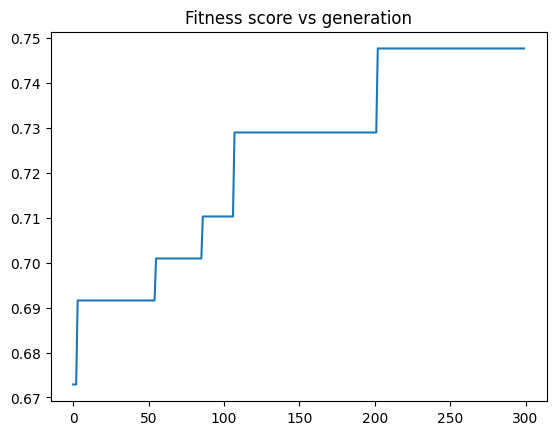

(array([0, 1, 1, ..., 1, 1, 0]), 0.7476635514018691)

In [17]:
genetic_algorithm(1300, 300, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6542056074766355 obtained at population: 358
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6542056074766355 obtained at population: 420
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6542056074766355 obtained at population: 420
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6542056074766355 obtained at population: 420
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6542056074766355 obtained at population: 420
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6542056074766355 obtained at population: 420
-------------------------------------------------------------------
Evaluating

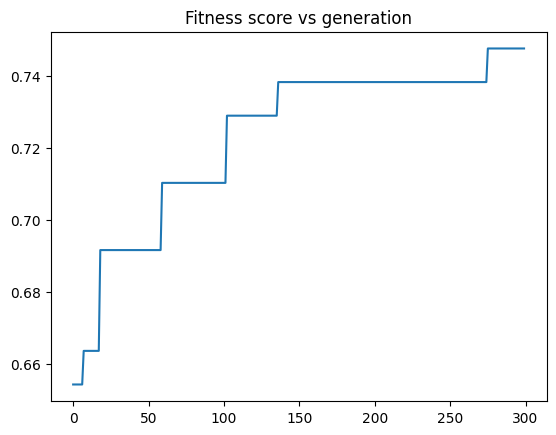

(array([1, 1, 0, ..., 1, 1, 1]), 0.7476635514018691)

In [18]:
genetic_algorithm(1400, 300, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6261682242990654 obtained at population: 648
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6728971962616822 obtained at population: 439
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6728971962616822 obtained at population: 450
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6728971962616822 obtained at population: 450
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6728971962616822 obtained at population: 450
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6728971962616822 obtained at population: 450
-------------------------------------------------------------------
Evaluating

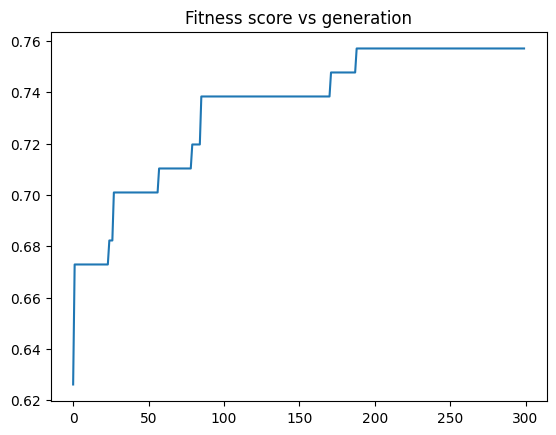

(array([0, 1, 1, ..., 0, 1, 0]), 0.7570093457943925)

In [19]:
genetic_algorithm(1500, 300, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 764
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 480
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 480
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 480
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 180
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 459
-------------------------------------------------------------------
Evaluating

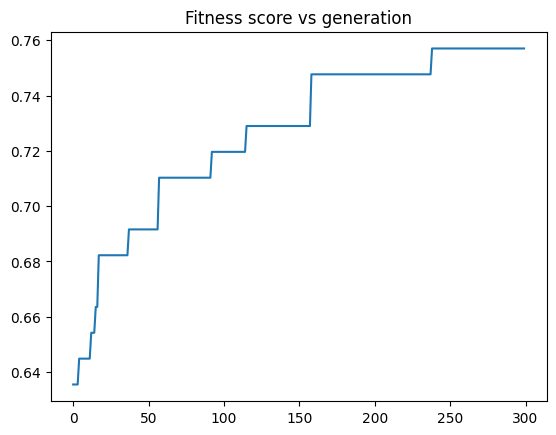

(array([0, 1, 0, ..., 1, 1, 1]), 0.7570093457943925)

In [20]:
genetic_algorithm(1600, 300, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 1346
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 183
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 510
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 510
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 143
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 510
-------------------------------------------------------------------
Evaluatin

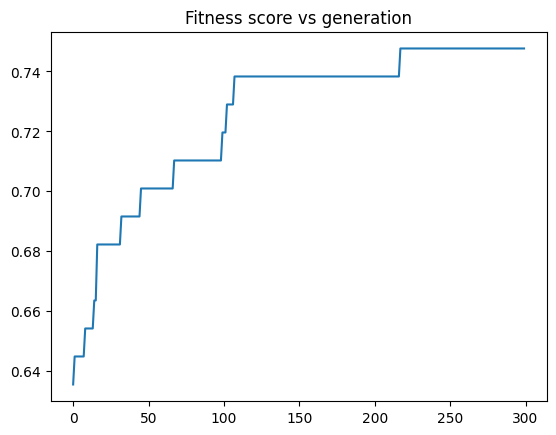

(array([0, 1, 0, ..., 0, 0, 0]), 0.7476635514018691)

In [21]:
genetic_algorithm(1700, 300, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.616822429906542 obtained at population: 167
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6542056074766355 obtained at population: 104
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6542056074766355 obtained at population: 540
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6635514018691588 obtained at population: 175
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6635514018691588 obtained at population: 540
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6635514018691588 obtained at population: 540
-------------------------------------------------------------------
Evaluating 

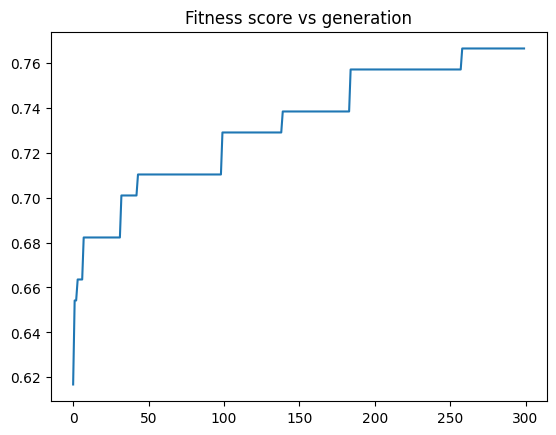

(array([0, 1, 0, ..., 1, 1, 1]), 0.7663551401869159)

In [22]:
genetic_algorithm(1800, 300, 0.3, 0.3) 

Evaluating the 0th generation
Best Fitness score :0.5981308411214953 obtained at population: 48
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.5981308411214953 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.5981308411214953 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6074766355140186 obtained at population: 13
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6074766355140186 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6074766355140186 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 6

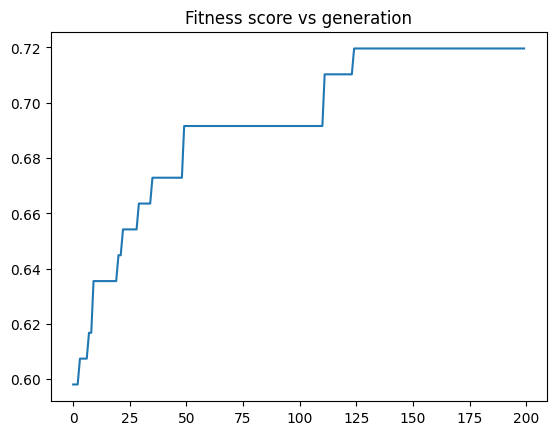

(array([1, 0, 0, ..., 0, 0, 1]), 0.719626168224299)

In [26]:
genetic_algorithm(100, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6074766355140186 obtained at population: 47
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6074766355140186 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6074766355140186 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.616822429906542 obtained at population: 27
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.616822429906542 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 14
-------------------------------------------------------------------
Evaluating the 6th

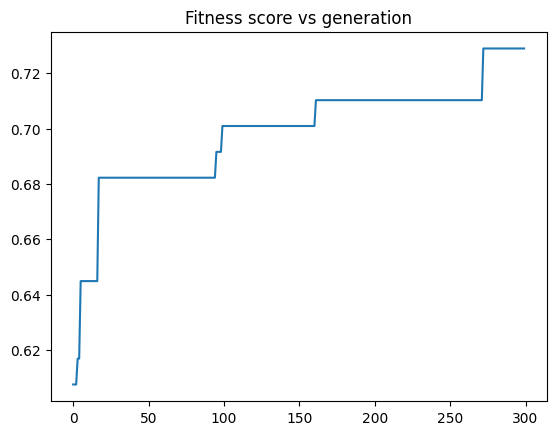

(array([1, 0, 1, ..., 0, 0, 0]), 0.7289719626168224)

In [27]:
genetic_algorithm(100, 300, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6261682242990654 obtained at population: 22
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6261682242990654 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6261682242990654 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6261682242990654 obtained at population: 39
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6261682242990654 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6261682242990654 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 6

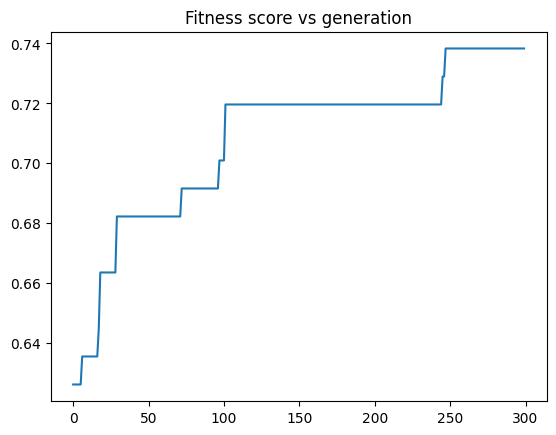

(array([0, 1, 1, ..., 1, 1, 1]), 0.7383177570093458)

In [29]:
genetic_algorithm(200, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 133
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6355140186915887 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6355140186915887 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 

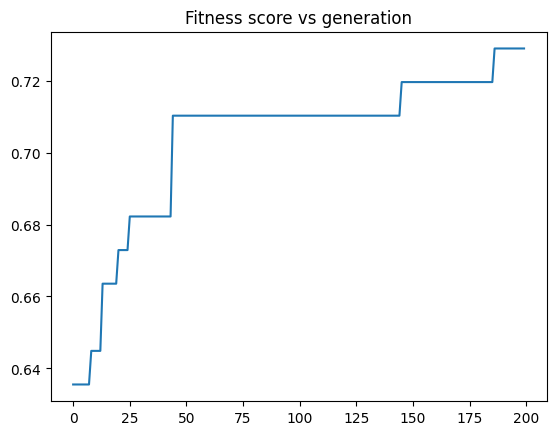

(array([1, 0, 1, ..., 1, 1, 1]), 0.7289719626168224)

In [31]:
genetic_algorithm(300, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.616822429906542 obtained at population: 2
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.616822429906542 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.616822429906542 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.616822429906542 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.616822429906542 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.616822429906542 obtained at population: 48
-------------------------------------------------------------------
Evaluating the 6th gene

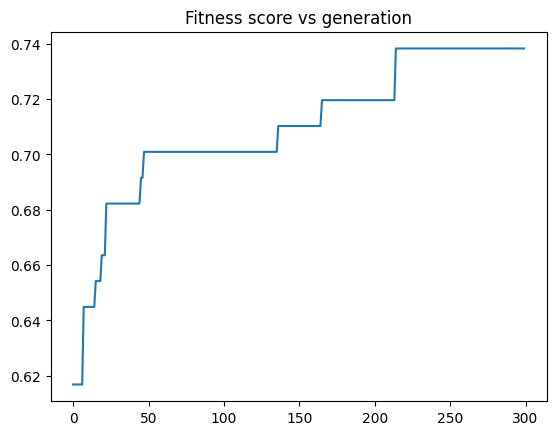

(array([0, 1, 1, ..., 0, 0, 1]), 0.7383177570093458)

In [32]:
genetic_algorithm(300, 300, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6074766355140186 obtained at population: 3
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6074766355140186 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6074766355140186 obtained at population: 52
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 86
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 120
-------------------------------------------------------------------
Evaluating the

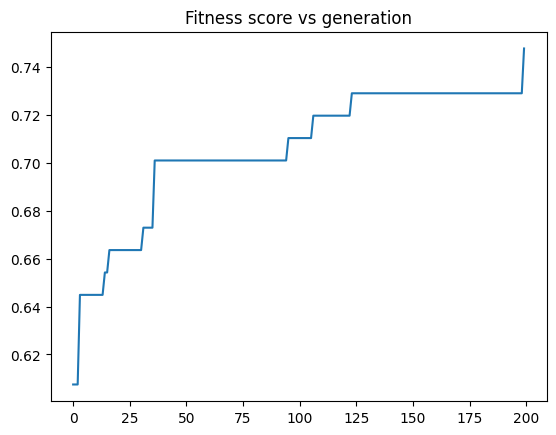

(array([0, 0, 0, ..., 0, 1, 1]), 0.7476635514018691)

In [33]:
genetic_algorithm(400, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6542056074766355 obtained at population: 392
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6542056074766355 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6542056074766355 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6542056074766355 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6542056074766355 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6542056074766355 obtained at population: 120
-------------------------------------------------------------------
Evaluating

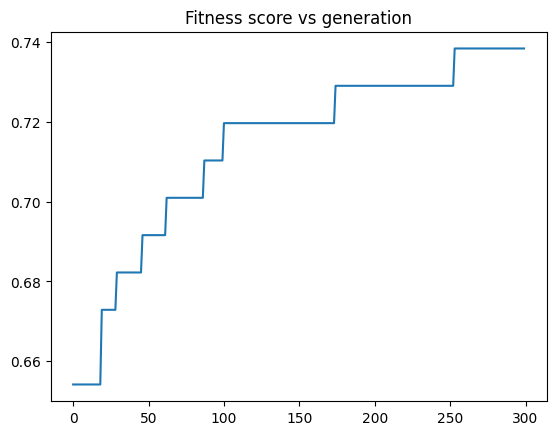

(array([1, 1, 1, ..., 1, 0, 0]), 0.7383177570093458)

In [34]:
genetic_algorithm(400, 300, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6448598130841121 obtained at population: 380
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 150
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 150
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 150
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 150
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 150
-------------------------------------------------------------------
Evaluating

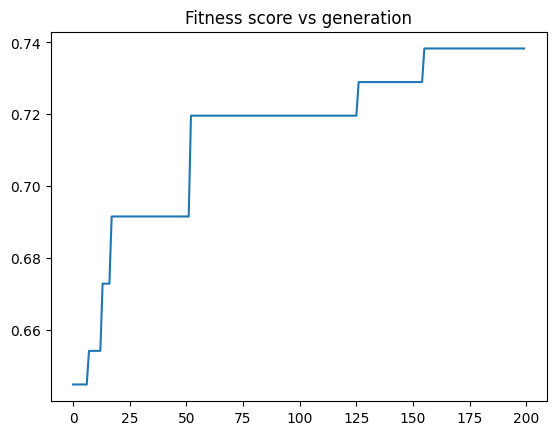

(array([1, 1, 1, ..., 0, 0, 0]), 0.7383177570093458)

In [35]:
genetic_algorithm(500, 200, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.5420560747663551 obtained at population: 4
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.5420560747663551 obtained at population: 3
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.5420560747663551 obtained at population: 3
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.5420560747663551 obtained at population: 3
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.5514018691588785 obtained at population: 0
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.5514018691588785 obtained at population: 3
-------------------------------------------------------------------
Evaluating the 6th gen

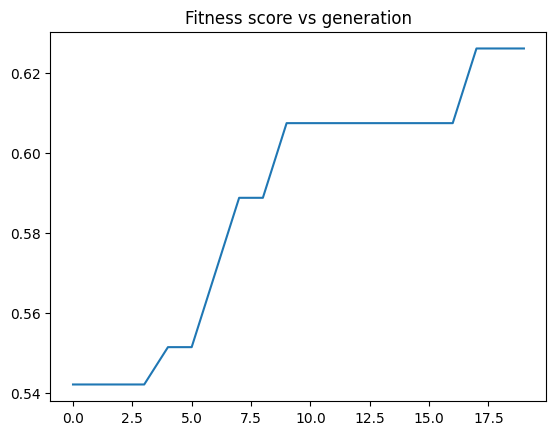

(array([0, 0, 0, ..., 1, 0, 1]), 0.6261682242990654)

In [19]:
genetic_algorithm(10, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.5794392523364486 obtained at population: 5
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.5887850467289719 obtained at population: 6
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.5887850467289719 obtained at population: 15
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.5887850467289719 obtained at population: 15
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.5887850467289719 obtained at population: 15
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.5981308411214953 obtained at population: 9
-------------------------------------------------------------------
Evaluating the 6th 

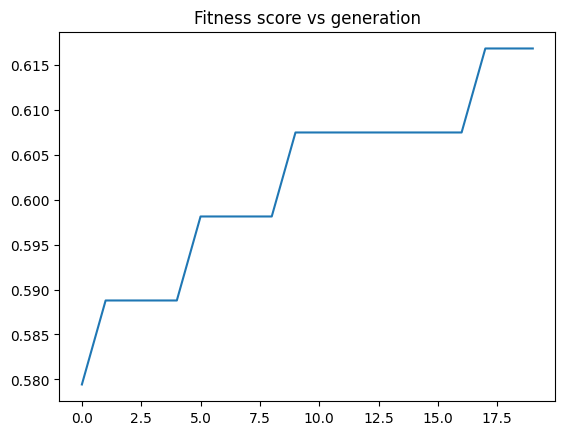

(array([0, 1, 1, ..., 1, 0, 1]), 0.616822429906542)

In [20]:
genetic_algorithm(50, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.5887850467289719 obtained at population: 12
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.5887850467289719 obtained at population: 11
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6074766355140186 obtained at population: 25
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6074766355140186 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6074766355140186 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6074766355140186 obtained at population: 30
-------------------------------------------------------------------
Evaluating the 6

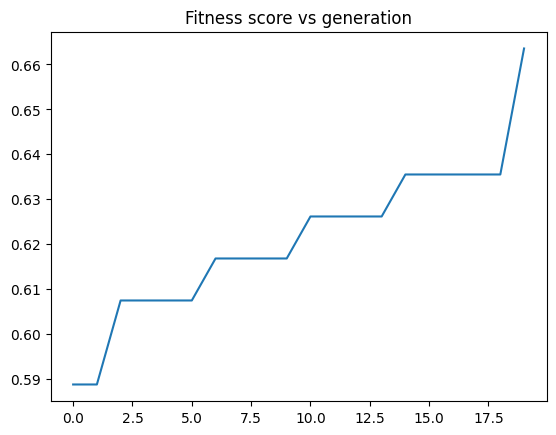

(array([0, 0, 1, ..., 0, 0, 1]), 0.6635514018691588)

In [21]:
genetic_algorithm(100, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 99
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6355140186915887 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6355140186915887 obtained at population: 60
-------------------------------------------------------------------
Evaluating the 6

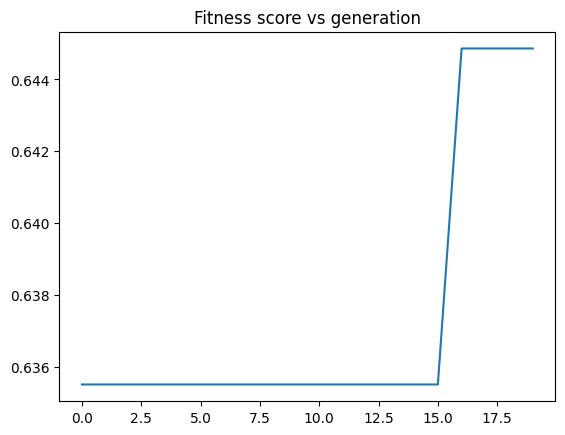

(array([0, 1, 0, ..., 0, 1, 0]), 0.6448598130841121)

In [22]:
genetic_algorithm(200, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6261682242990654 obtained at population: 154
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6261682242990654 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6261682242990654 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6261682242990654 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6261682242990654 obtained at population: 40
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6261682242990654 obtained at population: 90
-------------------------------------------------------------------
Evaluating the 

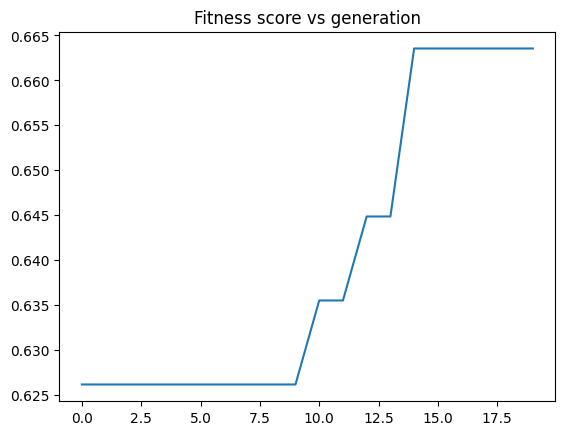

(array([1, 1, 0, ..., 0, 0, 0]), 0.6635514018691588)

In [23]:
genetic_algorithm(300, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 0
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 98
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 120
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 120
-------------------------------------------------------------------
Evaluating th

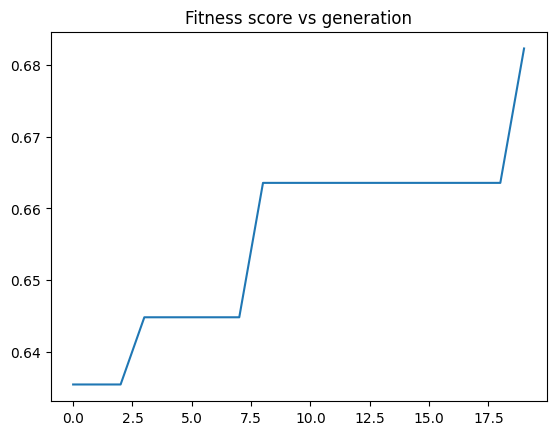

(array([1, 1, 0, ..., 1, 1, 0]), 0.6822429906542056)

In [24]:
genetic_algorithm(400, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6448598130841121 obtained at population: 332
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 150
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 27
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 150
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 150
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 150
-------------------------------------------------------------------
Evaluating 

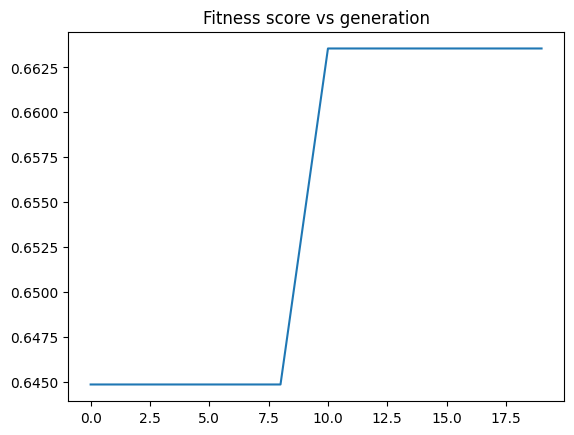

(array([0, 1, 0, ..., 1, 0, 0]), 0.6635514018691588)

In [25]:
genetic_algorithm(500, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.616822429906542 obtained at population: 291
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.616822429906542 obtained at population: 180
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.616822429906542 obtained at population: 180
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.616822429906542 obtained at population: 180
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6261682242990654 obtained at population: 53
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6261682242990654 obtained at population: 180
-------------------------------------------------------------------
Evaluating the 

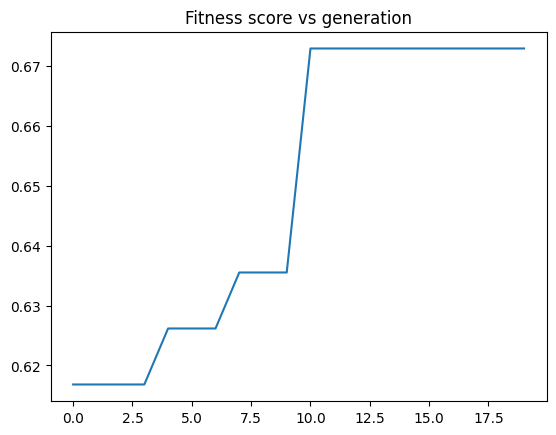

(array([1, 0, 0, ..., 0, 0, 0]), 0.6728971962616822)

In [26]:
genetic_algorithm(600, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6261682242990654 obtained at population: 77
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6448598130841121 obtained at population: 14
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6448598130841121 obtained at population: 210
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6448598130841121 obtained at population: 210
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 210
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 210
-------------------------------------------------------------------
Evaluating t

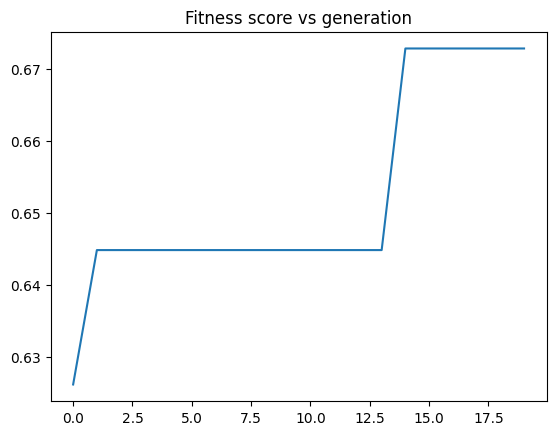

(array([0, 1, 0, ..., 0, 1, 0]), 0.6728971962616822)

In [27]:
genetic_algorithm(700, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6074766355140186 obtained at population: 456
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6074766355140186 obtained at population: 240
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 129
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 72
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6355140186915887 obtained at population: 240
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6355140186915887 obtained at population: 240
-------------------------------------------------------------------
Evaluating 

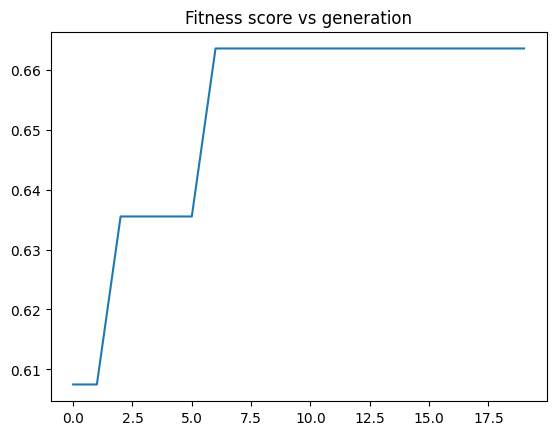

(array([0, 1, 1, ..., 1, 0, 0]), 0.6635514018691588)

In [28]:
genetic_algorithm(800, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6542056074766355 obtained at population: 355
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6542056074766355 obtained at population: 270
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6542056074766355 obtained at population: 261
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6542056074766355 obtained at population: 270
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6542056074766355 obtained at population: 270
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6542056074766355 obtained at population: 270
-------------------------------------------------------------------
Evaluating

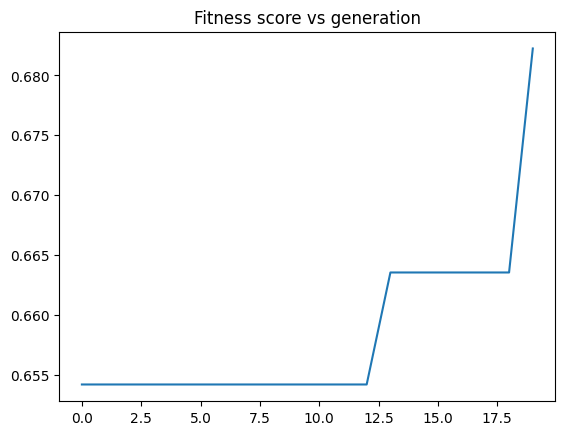

(array([1, 1, 0, ..., 0, 0, 0]), 0.6822429906542056)

In [29]:
genetic_algorithm(900, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 817
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6355140186915887 obtained at population: 300
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 38
-------------------------------------------------------------------
Evaluating 

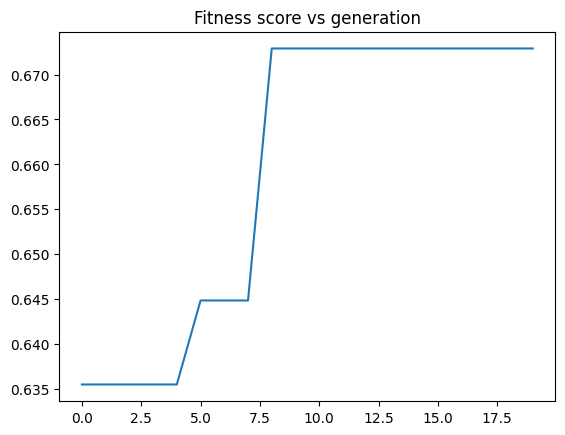

(array([0, 1, 0, ..., 0, 1, 0]), 0.6728971962616822)

In [30]:
genetic_algorithm(1000, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6261682242990654 obtained at population: 372
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6261682242990654 obtained at population: 330
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6542056074766355 obtained at population: 151
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6542056074766355 obtained at population: 69
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6542056074766355 obtained at population: 330
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6542056074766355 obtained at population: 330
-------------------------------------------------------------------
Evaluating 

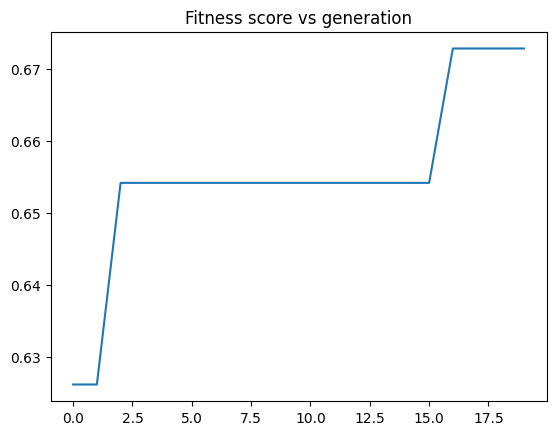

(array([1, 0, 1, ..., 1, 0, 1]), 0.6728971962616822)

In [31]:
genetic_algorithm(1100, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 1142
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 360
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 42
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 360
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6355140186915887 obtained at population: 28
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6355140186915887 obtained at population: 197
-------------------------------------------------------------------
Evaluating 

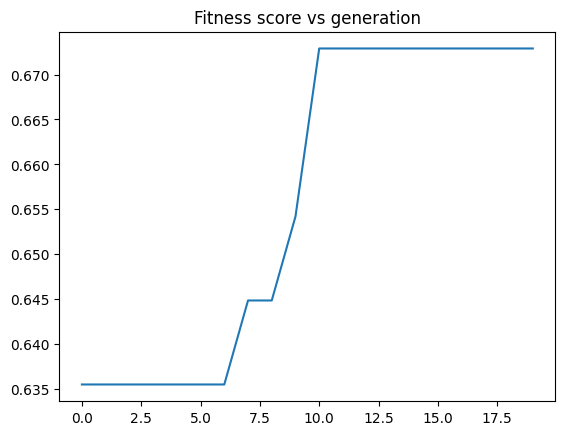

(array([1, 1, 0, ..., 1, 0, 0]), 0.6728971962616822)

In [32]:
genetic_algorithm(1200, 20, 0.3, 0.3)

Evaluating the 0th generation
Best Fitness score :0.6355140186915887 obtained at population: 883
-------------------------------------------------------------------
Evaluating the 1th generation
Best Fitness score :0.6355140186915887 obtained at population: 390
-------------------------------------------------------------------
Evaluating the 2th generation
Best Fitness score :0.6355140186915887 obtained at population: 390
-------------------------------------------------------------------
Evaluating the 3th generation
Best Fitness score :0.6355140186915887 obtained at population: 390
-------------------------------------------------------------------
Evaluating the 4th generation
Best Fitness score :0.6448598130841121 obtained at population: 230
-------------------------------------------------------------------
Evaluating the 5th generation
Best Fitness score :0.6448598130841121 obtained at population: 390
-------------------------------------------------------------------
Evaluating

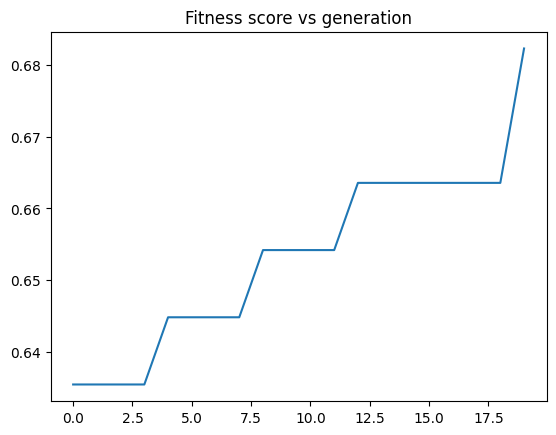

(array([0, 0, 0, ..., 1, 0, 1]), 0.6822429906542056)

In [33]:
genetic_algorithm(1300, 20, 0.3, 0.3)

In [39]:
x = [10, 50, 100, 200,300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]
y = [0.6261, 0.6168, 0.6635, 0.6448, 0.6635, 0.6822, 0.6635, 0.6729, 0.6729, 0.6635, 0.6822, 0.6729, 0.6729, 0.6729, 0.6822]

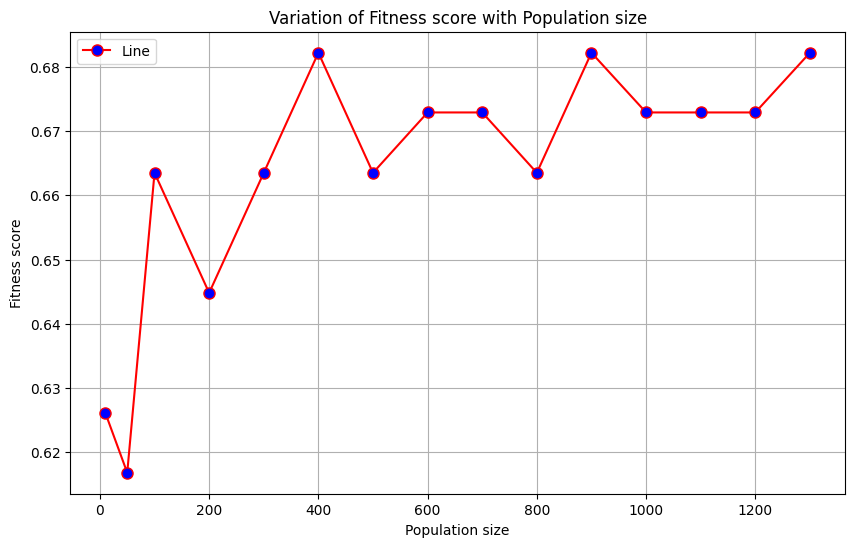

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='red', label='Line', marker='o', markerfacecolor='blue', markersize=8)
plt.title('Variation of Fitness score with Population size')
plt.xlabel('Population size')
plt.ylabel('Fitness score')
plt.legend()
plt.grid(True)
plt.show()